<a href="https://colab.research.google.com/github/SayedShaun/Machine-Learning/blob/main/Email_Spam_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import zipfile
sns.set_style("darkgrid")
plt.style.use("fivethirtyeight")
import warnings
warnings.filterwarnings("ignore")
import streamlit as st

## Email Spam Classifier

In [ ]:
!kaggle datasets download -d purusinghvi/email-spam-classification-dataset

Dataset URL: https://www.kaggle.com/datasets/purusinghvi/email-spam-classification-dataset
License(s): MIT
email-spam-classification-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
def unzipper(file):
    with zipfile.ZipFile(file, 'r') as zip_ref:
        zip_ref.extractall()

unzipper('/content/email-spam-classification-dataset.zip')

In [ ]:
df = pd.read_csv('/content/combined_data.csv')
df.head()

,label,text
0,1,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get your medircations online qnb ikud v...
2,0,computer connection from cnn com wednesday es...
3,1,university degree obtain a prosperous future m...
4,0,thanks for all your answers guys i know i shou...


In [ ]:
x = df['text']
y = df['label']

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english')
x = vectorizer.fit_transform(x)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score
)

def classification_reports(y_test, y_pred):
    print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')
    print(f'Precision: {precision_score(y_test, y_pred):.2f}')
    print(f'Recall: {recall_score(y_test, y_pred):.2f}')
    print(f'F1 Score: {f1_score(y_test, y_pred):.2f}')
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap="viridis")
    plt.show()

Accuracy: 0.98
Precision: 0.99
Recall: 0.96
F1 Score: 0.98


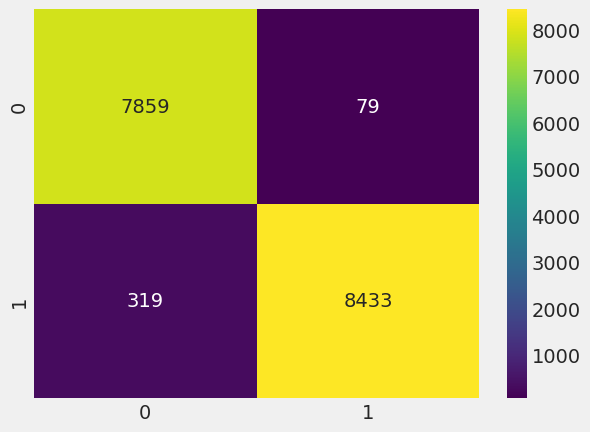

In [ ]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
classification_reports(y_test, y_pred)

In [ ]:
def spam_check(email):
    email = vectorizer.transform([email])
    result = model.predict(email)
    if result == 1:
        print('Spam')
    else:
        print('Not Spam')

In [ ]:
test = "wulvob get your medircations online qnb ikud"
spam_check(test)

Spam


In [ ]:
import joblib

def save_weights(model, path):
    joblib.dump(model, path, compress=5)

In [ ]:
save_weights(model, 'email_spam_model.pkl')

In [ ]:
save_weights(vectorizer, 'email_spam_tfidf-vectorizer.pkl')

In [ ]:
# Streamlit App
%%writefile app.py
import streamlit as st
import numpy as np
import joblib

hide_streamlit_style = """
<style>
#MainMenu {visibility: hidden;}
footer {visibility: hidden;}
</style>
"""
st.markdown(hide_streamlit_style, unsafe_allow_html=True)

st.title("Email Spam Classifier")
input_email = st.text_area("Leave Your Email Here", height=100)

def user_input(email:str)->np.array:
  vector = joblib.load("email_spam_tfidf-vectorizer.pkl")
  return vector.transform([email])

def predict(email_vector:np.array)->str:
  model = joblib.load("email_spam_model.pkl")
  return model.predict(email_vector)[0]


output = predict(user_input(input_email))
check_email = st.button("Check Email", use_container_width=True)

if check_email:
  if output == 1:
    st.write("This is a Spam Email, Be Careful!")
  else:
    st.write("This is a Ham Email, No Problem!")

Overwriting app.py


In [ ]:
# !streamlit run app.py & npx localtunnel --port 8501